<a href="https://colab.research.google.com/github/coronarita/TIL/blob/main/Keras_Ch3_20240516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np

# Keras and Tensorflow

## 상수 텐서

In [18]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [19]:
x = tf.zeros(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

## Random 텐서

In [20]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.7060474 ],
       [ 0.30356115],
       [-0.63376105]], dtype=float32)>

In [21]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.845871 ],
       [0.9038607],
       [0.8342382]], dtype=float32)>

## 넘파이 배열에 값 할당하기

In [22]:
x = np.ones(shape=(2,2))
x

array([[1., 1.],
       [1., 1.]])

In [23]:
x[1,1] = 3
x

array([[1., 1.],
       [1., 3.]])

## 텐서플로 변수 만들기, 값 할당하기

In [24]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.71061325],
       [-0.8480447 ],
       [-0.19529088]], dtype=float32)>

In [25]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [26]:
v[0, 0].assign(3.)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [27]:
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

## GradientTape API

In [28]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var) # 9.
gradient = tape.gradient(result, input_var) # 9 - 3 = 6

In [29]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [30]:
# 상수 입력텐서 - tape.watch해 줘야 함.
# 훈련 가능한 변수만 추적하기 때문에

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const) # 9 - 3 = 6
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [31]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time **2
    speed = inner_tape.gradient(position, time)

acceleration = outer_tape.gradient(speed, time)

In [32]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [33]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

## 텐서플로 선형 분류기

In [34]:
# Generate Random points
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)


In [35]:
# 두 클래스 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [36]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))

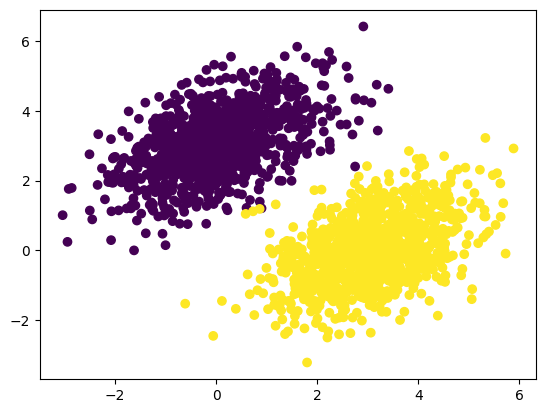

In [37]:
# 두 클래스 그리기
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [38]:
# 선형분류기 변수 생성
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [39]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [40]:
def square_loss(targets, preds):
    per_sample_loss = tf.square(targets - preds)
    return tf.reduce_mean(per_sample_loss)

In [41]:
lr = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        pred = model(inputs)
        loss = square_loss(targets, pred)
    grad_W, grad_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_W*lr)
    b.assign_sub(grad_b*lr)
    return loss

In [42]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스템에서의 손실:{loss:.4f}")

0번째 스템에서의 손실:0.4701
1번째 스템에서의 손실:0.0828
2번째 스템에서의 손실:0.0697
3번째 스템에서의 손실:0.0648
4번째 스템에서의 손실:0.0613
5번째 스템에서의 손실:0.0583
6번째 스템에서의 손실:0.0556
7번째 스템에서의 손실:0.0530
8번째 스템에서의 손실:0.0507
9번째 스템에서의 손실:0.0486
10번째 스템에서의 손실:0.0467
11번째 스템에서의 손실:0.0449
12번째 스템에서의 손실:0.0432
13번째 스템에서의 손실:0.0417
14번째 스템에서의 손실:0.0403
15번째 스템에서의 손실:0.0390
16번째 스템에서의 손실:0.0379
17번째 스템에서의 손실:0.0368
18번째 스템에서의 손실:0.0358
19번째 스템에서의 손실:0.0349
20번째 스템에서의 손실:0.0341
21번째 스템에서의 손실:0.0333
22번째 스템에서의 손실:0.0326
23번째 스템에서의 손실:0.0319
24번째 스템에서의 손실:0.0314
25번째 스템에서의 손실:0.0308
26번째 스템에서의 손실:0.0303
27번째 스템에서의 손실:0.0298
28번째 스템에서의 손실:0.0294
29번째 스템에서의 손실:0.0290
30번째 스템에서의 손실:0.0287
31번째 스템에서의 손실:0.0283
32번째 스템에서의 손실:0.0280
33번째 스템에서의 손실:0.0278
34번째 스템에서의 손실:0.0275
35번째 스템에서의 손실:0.0273
36번째 스템에서의 손실:0.0271
37번째 스템에서의 손실:0.0269
38번째 스템에서의 손실:0.0267
39번째 스템에서의 손실:0.0265


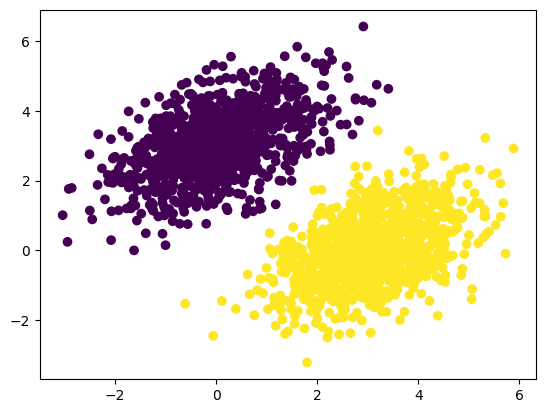

In [43]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

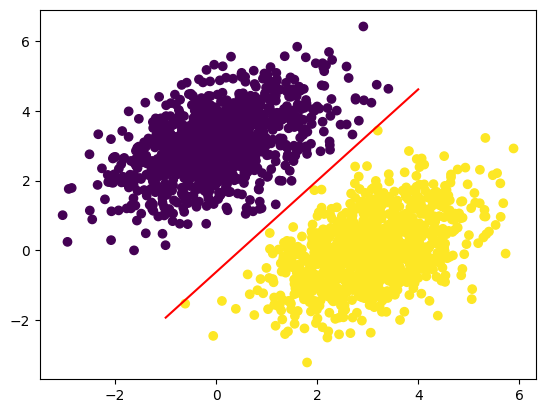

In [44]:
x = np.linspace(-1,4,100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

#케라스 API 이해하기

In [45]:
# Layer의 서브클래스 Dense

from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units=units
        self.activation=activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape = (input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape = (self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) +self.b
        if self.activation is not None :
            y = self.activation(y)
        return y

In [46]:
import tensorflow as tf

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


(2, 32)


In [47]:
# 자동크기 추론 - 동적으로 층 만들기
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [49]:
#기본 레이어(Layer) 클래스의 __call__()

def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs) # call 호출?

In [50]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax"),
])

In [51]:
# 층에서 모델로 - 컴파일 단계, 학습 과정 설정
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [52]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [53]:
# fit메서드 이해

history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size= 128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 7.6704 - binary_accuracy: 0.0295
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 7.3331 - binary_accuracy: 0.0295
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 7.0470 - binary_accuracy: 0.0305
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 6.7720 - binary_accuracy: 0.0305
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 6.5054 - binary_accuracy: 0.0310


In [54]:
history.history

{'loss': [7.6703948974609375,
  7.333123683929443,
  7.047029972076416,
  6.771989345550537,
  6.505362033843994],
 'binary_accuracy': [0.029500000178813934,
  0.029500000178813934,
  0.030500000342726707,
  0.030500000342726707,
  0.03099999949336052]}

In [56]:
# 검증데이터에서 손실, 측정 지표 모니터링

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation] # 섞은대로 순서를 변경
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 *len(inputs)) # Data split
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[: num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data= (val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.2971 - binary_accuracy: 0.9714 - val_loss: 0.0993 - val_binary_accuracy: 0.9700
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0784 - binary_accuracy: 0.9500 - val_loss: 0.0882 - val_binary_accuracy: 0.9300
Epoch 3/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0707 - binary_accuracy: 0.9636 - val_loss: 0.0479 - val_binary_accuracy: 0.9883
Epoch 4/5
88/88 [==============================] - 1s 7ms/step - loss: 0.0775 - binary_accuracy: 0.9579 - val_loss: 0.0591 - val_binary_accuracy: 0.9883
Epoch 5/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0739 - binary_accuracy: 0.9521 - val_loss: 0.0475 - val_binary_accuracy: 0.9950


In [57]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])


5/5 [==============================] - 0s 2ms/step
[[-0.0581286 ]
 [ 0.8084924 ]
 [ 0.861521  ]
 [ 0.15700102]
 [ 0.08379987]
 [ 0.02819556]
 [ 0.7588495 ]
 [ 0.16041827]
 [ 0.19836122]
 [ 0.8074077 ]]


In [59]:
indices_permutation = np.random.permutation(10)
indices_permutation

array([6, 0, 9, 2, 4, 1, 7, 5, 3, 8])

In [60]:
inputs[indices_permutation]

array([[ 0.70394295,  4.410873  ],
       [ 0.68629533,  3.9261675 ],
       [ 1.1272566 ,  3.9448092 ],
       [ 0.57030696,  2.3578677 ],
       [ 0.6114326 ,  3.821435  ],
       [ 1.9714159 ,  5.368422  ],
       [-0.18886656,  4.331348  ],
       [-1.3938695 ,  0.4883014 ],
       [-0.09029194,  2.0320878 ],
       [ 0.65339833,  4.327253  ]], dtype=float32)

In [61]:
inputs[:10]

array([[ 0.68629533,  3.9261675 ],
       [ 1.9714159 ,  5.368422  ],
       [ 0.57030696,  2.3578677 ],
       [-0.09029194,  2.0320878 ],
       [ 0.6114326 ,  3.821435  ],
       [-1.3938695 ,  0.4883014 ],
       [ 0.70394295,  4.410873  ],
       [-0.18886656,  4.331348  ],
       [ 0.65339833,  4.327253  ],
       [ 1.1272566 ,  3.9448092 ]], dtype=float32)